### NAM NGUYEN
### 01/04/2025
### Predictive Analysis in Cardiovascular Medicine

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

# Load the dataset
data = pd.read_csv('heart_failure_clinical_records_with_severity.csv')


# TASK 1:
## 1.1. Summary Statistics 

In [82]:
# Display basic information
print("Dataset shape:", data.shape)

print("\nFirst 5 rows:")
print(data.head())

print("\nData types and missing values:")
print(data.info())

print("\nSummary:")
print(data.describe())

Dataset shape: (299, 14)

First 5 rows:
    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  Severity  
0        0     4      

### The dataset contains:
- 299 records with 14 features (including the target variables 'DEATH_EVENT')
- No missing values in any columns
- Binary categorical features: anaemia, diabetes, high_blood_pressure, sex, smoking, DEATH_EVENT- 
Continuous features: age, creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine, serum_sodium, time, Severi
- The mean age is about 61 years old
- About 32% of patients died (DEATH_EVENT mean = 0.32)ty

## 1.2 Data Visualization

<Figure size 1500x1000 with 0 Axes>

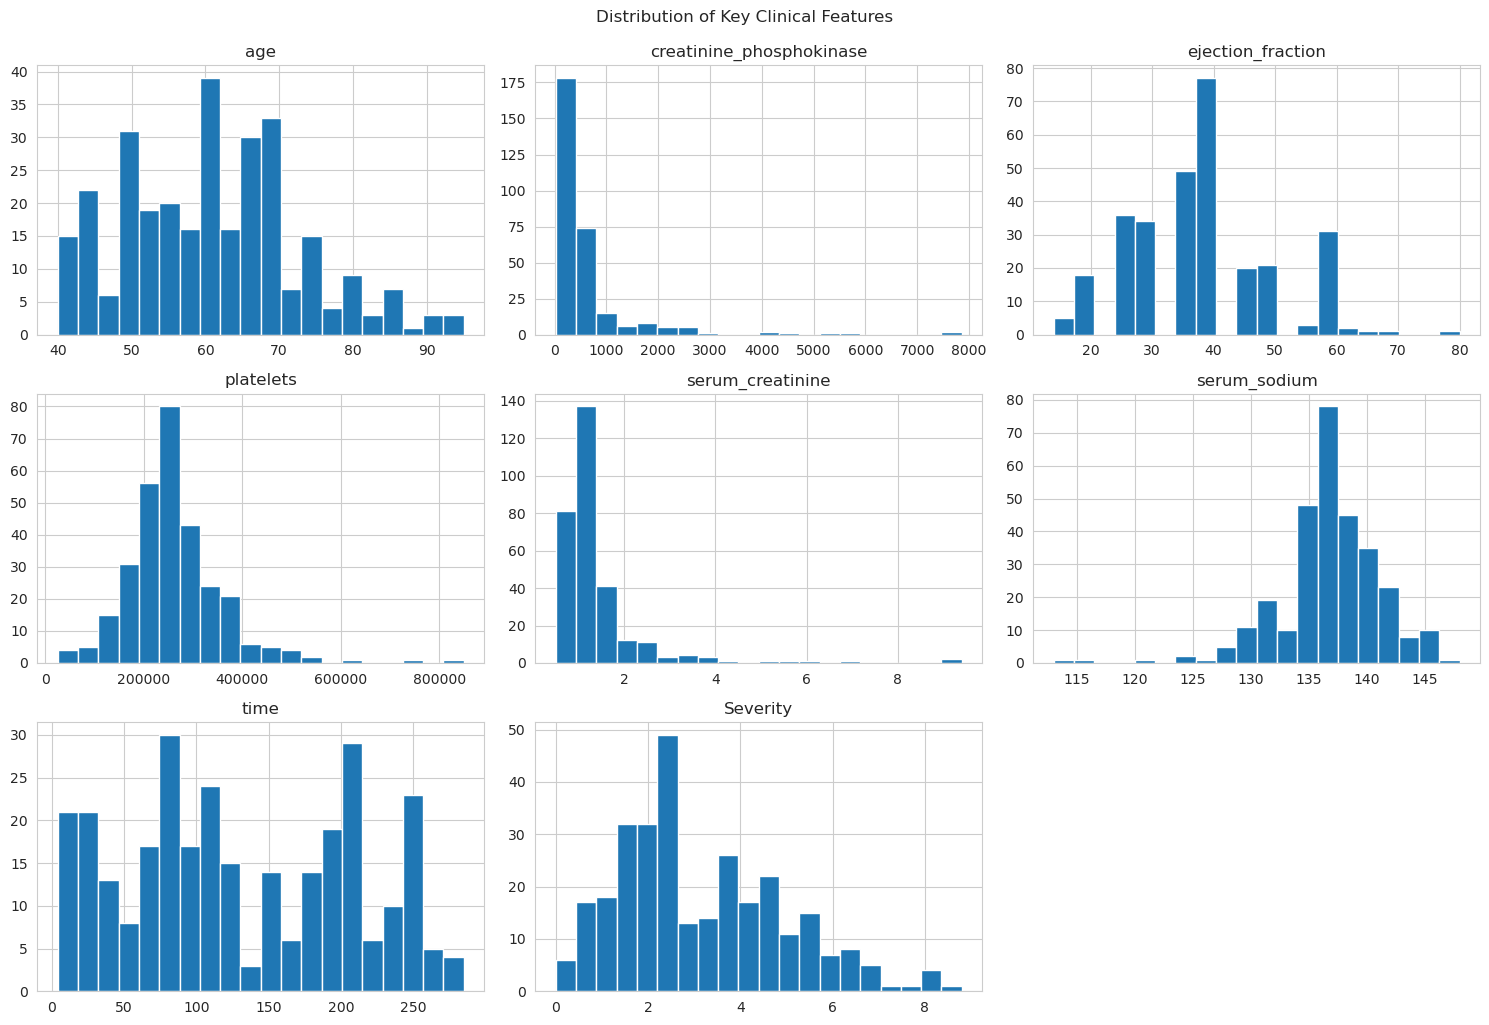

In [83]:
# Set style for plots
sns.set_style("whitegrid")
plt.figure(figsize=(15,10))

# 1. Histograms for numerical features
numerical_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 
                     'platelets', 'serum_creatinine', 'serum_sodium', 'time', 'Severity']
data[numerical_features].hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.suptitle('Distribution of Key Clinical Features', y=1.02)  # More descriptive title
plt.show()

### Histogram Analysis:
- Age: Most patients are between 50 and 75 years old, which is common for heart failure.
- Creatinine Phosphokinase: Most values are below 1000, but a few go up to 8000.
- Ejection Fraction: Many patients have values around 35-40%, which is lower than the normal 50-70%, indicating heart issues.
- Platelets: The values mostly cluster around 250,000, which is within the healthy range.
- Serum Creatinine: Most values fall between 0.5-1.5 mg/dL.
- Serum Sodium: Generally falls in the normal 135-145 mEq/L range.
- Time: Most patients were tracked for less than 250 days.
- Severity: Scores range from 0 to 9, with most patients scoring between 1 and 5.

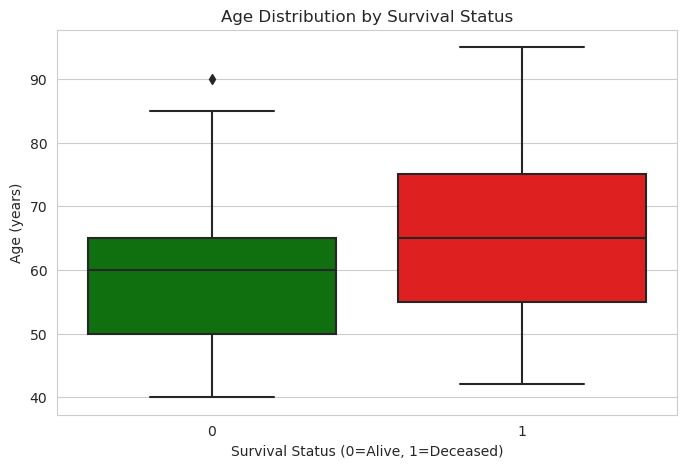

In [84]:
# 2. Age vs Survival
plt.figure(figsize=(8, 5))
sns.boxplot(x='DEATH_EVENT', y='age', data=data, palette={0:"green", 1:"red"})
plt.title('Age Distribution by Survival Status')
plt.xlabel('Survival Status (0=Alive, 1=Deceased)')
plt.ylabel('Age (years)')
plt.show()

### Age Analysis:
- Median age for survivors: ~60 years.
- Median age for deceased: ~65 years.

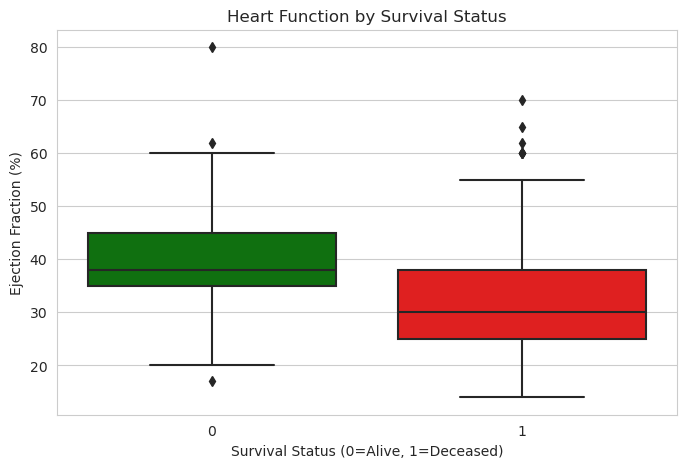

In [85]:
# 3. Ejection Fraction Analysis
plt.figure(figsize=(8, 5))
sns.boxplot(x='DEATH_EVENT', y='ejection_fraction', data=data, palette={0:"green", 1:"red"})
plt.title('Heart Function by Survival Status')
plt.xlabel('Survival Status (0=Alive, 1=Deceased)')
plt.ylabel('Ejection Fraction (%)') 
plt.show()

### Ejection Fraction Findings:
- Survivors: Median around 40% (moderately reduced heart function)
- Deceased: Median around 30% (severely reduced function)ion)

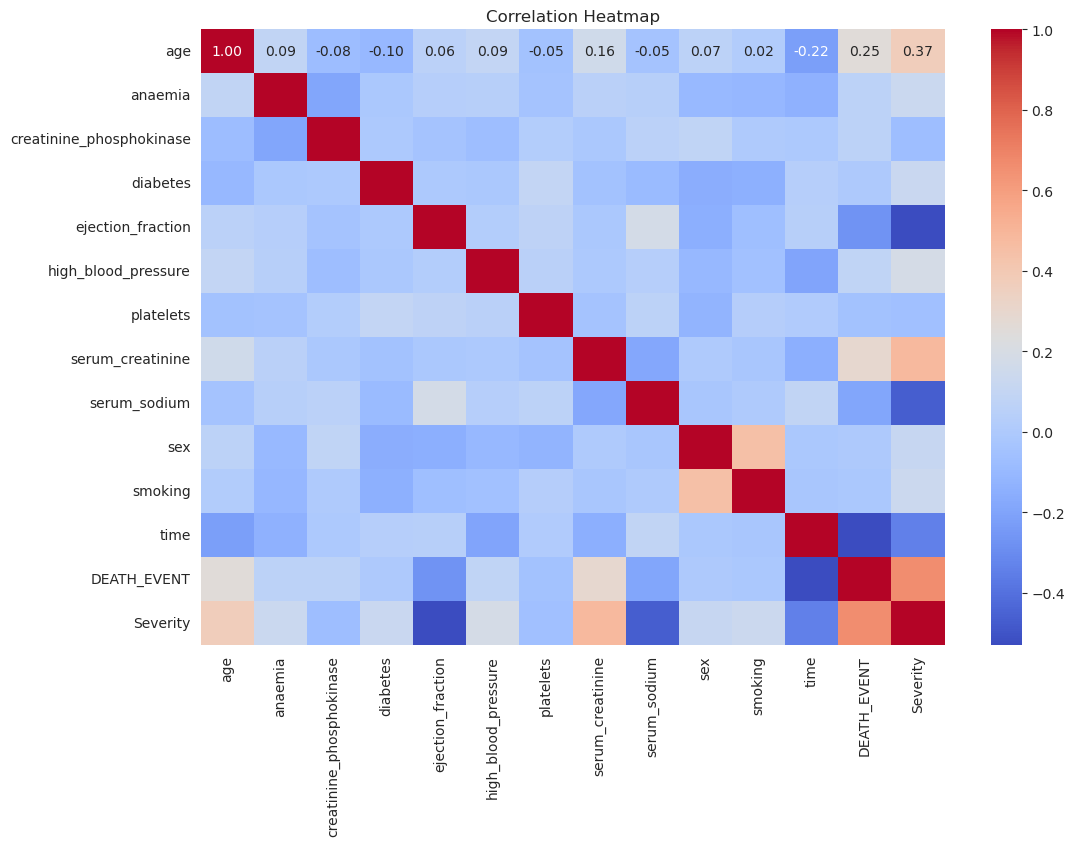

In [86]:
# 4. Correlation Heatmap
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Correlation Heatmap Insights:

- Strongest positive correlations with DEATH_EVENT: serum creatinine, age, severity. This means higher creatinine levels, older age, and higher severity scores are linked to a greater risk of death.
- Strongest negative correlations with DEATH_EVENT: ejection fraction, serum sodium, time. This shows that better heart function (higher ejection fraction), normal sodium levels, and longer follow-up time are associated with lower mortality.
- Severity shows moderate to strong correlations with: serum creatinine, age, ejection fraction, serum sodium. This suggests that kidney functions, age, heart function, and electrolyte balance play key roles in determining heart failure severity.
- Features like Diabetes, High Blood Pressure, and Smoking have weak correlations with Severity and DEATH_EVENT, meaning they are not strong predictors of severity or death in this dataset.

Serum sodium (-0.28)

## 1.3 Pairplot Analysis:

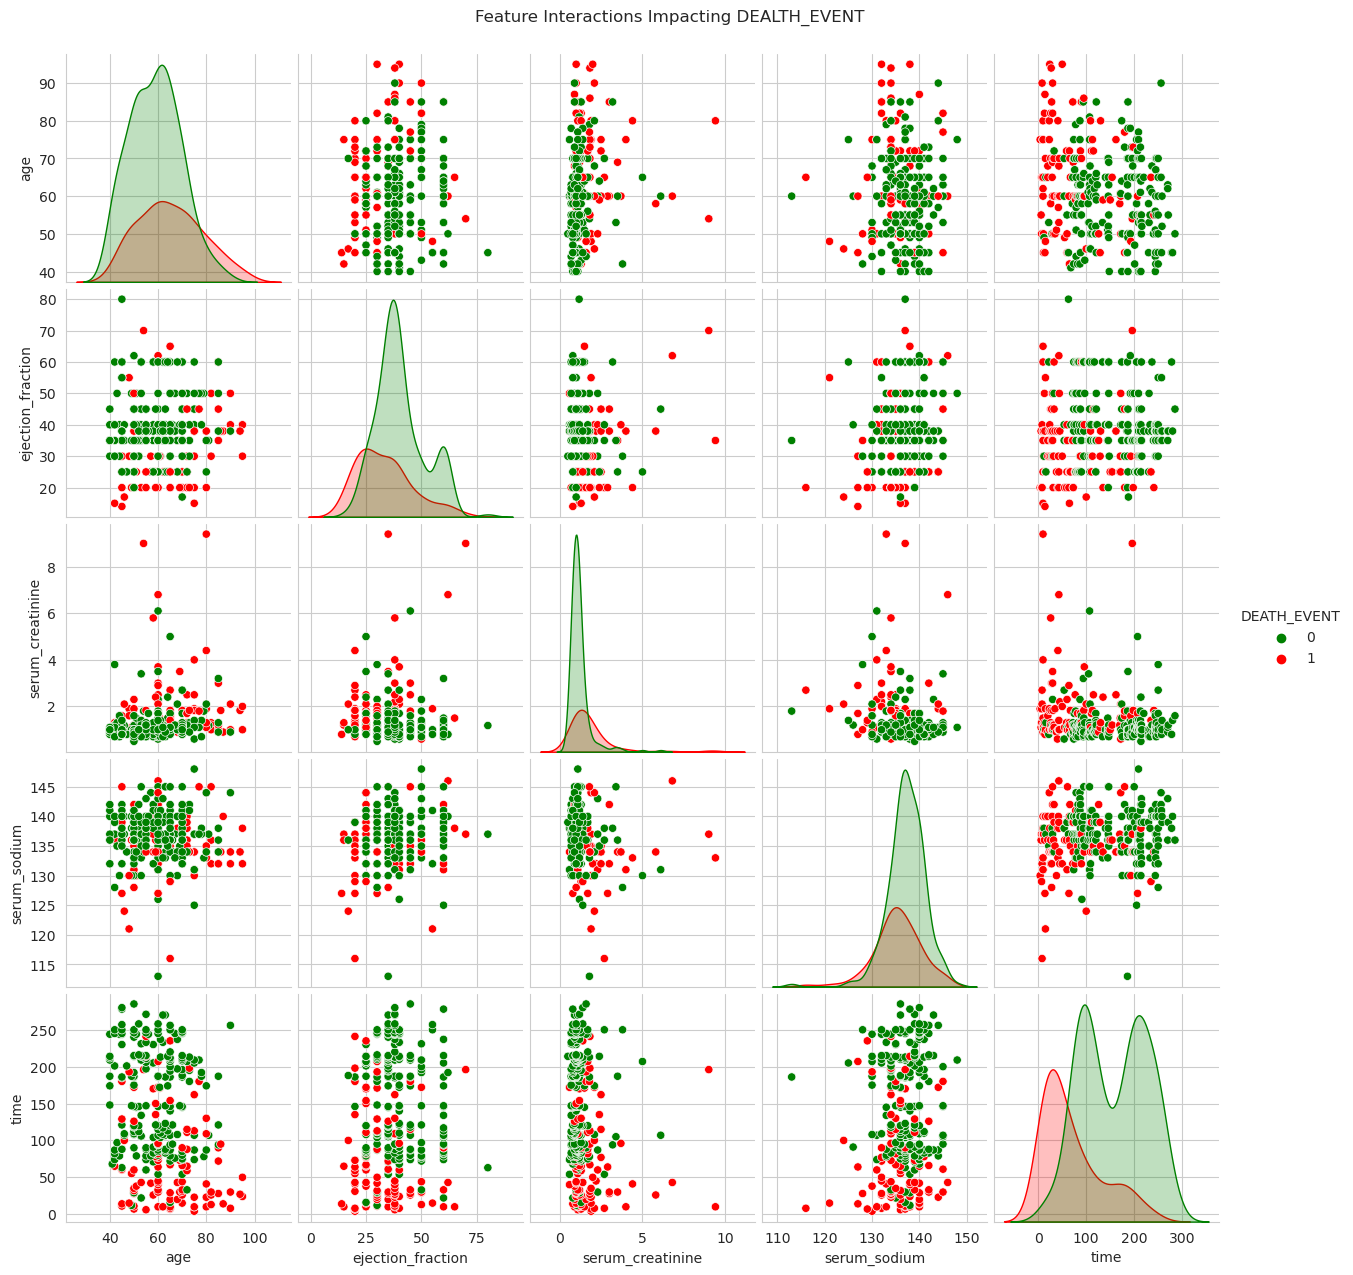

In [87]:
# Select key features that correlate most with DEATH_EVENT
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

selected_features = ['age', 'ejection_fraction', 'serum_creatinine', 
                    'serum_sodium', 'time', 'DEATH_EVENT']
sns.pairplot(data[selected_features], hue='DEATH_EVENT', palette={0: 'green', 1: 'red'})
plt.suptitle('Feature Interactions Impacting DEALTH_EVENT', y=1.02)
plt.show()

### Pairplot Observations:
1. Age:
   - Most patients who died (red) were 60 or older. Most survivors (green) were younger than 60.
   - Therefore, older patients are more likely to die from heart failure.
2. Time:
   - Most deaths happened in the first 100 days. Survivors were tracked for much longer.
   - Therefore, the first few months are crucial for heart failure patients.
3. Ejection Fraction:
   - Most who died had weak hearts (pumping < 40% of blood). Most survivors had stronger hearts (pumping > 35%)
   - Therefore, patients with weaker hearts are much more likely to die.
4. Serum Creatinine:
   - Most deaths happened when kidney tests were high (>1.2). Almost no deaths when kidney tests were very low (<0.9).
   - Therefore, poor kidney health makes heart failure much more deadly.
5. Serum Sodium:
   - Most deaths happened when salt levels were low (<135). Most survivors had normal salt levels (135-145).
   - Therefore, low salt levels make heart failure more dangerous.
   

## Task 2: Regression Analysis:
### 2.1 Training and Testing Split:

In [131]:
# Select features and target
X = data.drop(['Severity', 'DEATH_EVENT'], axis=1)
y = data['Severity']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (239, 12)
Test set shape: (60, 12)


### Regression:

In [132]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Results:")
print(f"MSE: {mse_lr:.4f}")
print(f"R-squared: {r2_lr:.4f}")

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("\nRidge Regression Results:")
print(f"MSE: {mse_ridge:.4f}")
print(f"R-squared: {r2_ridge:.4f}")

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Identify important features from Lasso
lasso_coef = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso.coef_})
important_features = lasso_coef[lasso_coef['Coefficient'] != 0].sort_values('Coefficient', ascending=False)

print("\nLasso Regression Results:")
print(f"MSE: {mse_lasso:.4f}")
print(f"R-squared: {r2_lasso:.4f}")
print("\nImportant features from Lasso:")
print(important_features)

Linear Regression Results:
MSE: 0.8519
R-squared: 0.7300

Ridge Regression Results:
MSE: 0.8476
R-squared: 0.7314

Lasso Regression Results:
MSE: 0.7735
R-squared: 0.7549

Important features from Lasso:
                Feature  Coefficient
7      serum_creatinine     0.598888
0                   age     0.454397
5   high_blood_pressure     0.196236
3              diabetes     0.186401
10              smoking     0.176750
1               anaemia     0.087521
11                 time    -0.191609
8          serum_sodium    -0.492974
4     ejection_fraction    -0.767487


#### Serum creatinine and age appear to be the most important factors influencing severity and death.

### 2.5 Kernel Regression

In [145]:
from sklearn.svm import SVR

def svr_models(X_train, y_train, X_test, y_test):
    results = {}
    
    # Linear Kernel
    svr_linear = SVR(kernel='linear')
    svr_linear.fit(X_train, y_train)
    y_pred_linear = svr_linear.predict(X_test)
    
    # Polynomial Kernel
    svr_poly = SVR(kernel='poly', degree=1, coef0=1, C=10)
    svr_poly.fit(X_train, y_train)
    y_pred_poly = svr_poly.predict(X_test)
    
    # RBF Kernel
    svr_rbf = SVR(kernel='rbf', C=100, gamma='scale')
    svr_rbf.fit(X_train, y_train)
    y_pred_rbf = svr_rbf.predict(X_test)
    
    # Store results
    results['linear'] = {
        'mse': mean_squared_error(y_test, y_pred_linear),
        'r2': r2_score(y_test, y_pred_linear)
    }
    
    results['poly'] = {
        'mse': mean_squared_error(y_test, y_pred_poly),
        'r2': r2_score(y_test, y_pred_poly)
    }
    
    results['rbf'] = {
        'mse': mean_squared_error(y_test, y_pred_rbf),
        'r2': r2_score(y_test, y_pred_rbf)
    }
    
    return results

# Run models and get results
svr_results = svr_models(X_train_scaled, y_train, X_test_scaled, y_test)

# Display results
for kernel, metrics in svr_results.items():
    print(f"{kernel.upper()} Kernel:")
    print(f"  MSE: {metrics['mse']:.4f}")
    print(f"  R²: {metrics['r2']:.4f}\n")

LINEAR Kernel:
  MSE: 0.8605
  R²: 0.7273

POLY Kernel:
  MSE: 0.8604
  R²: 0.7273

RBF Kernel:
  MSE: 0.7888
  R²: 0.7500



### 2.7 Discussion of Regression Models:
#### Strengths and Weaknesses:

1. Linear Regression: 
- Strengths: Provides a simple benchmark for predicting Severity. Shows the overall trend but may not capture all important relationships.
- Weaknesses: Has the high MSE (0.85) and lowest R² (0.730), meaning it struggles to accurately predict Severity. It may be affected by irrelevant features and multicollinearity.
2. Ridge Regression:
- Strengths: Improves prediction accuracy over Linear Regression. It better handles multicollinearity, leading to a lower MSE (0.84) and improved R² (0.73).
- Weaknesses: Still retains all features, which may slightly reduce its effectiveness in focusing on key predictors.
3. Lasso Regression:
- Strengths: Performs best for predicting Severity, with the lowest MSE (0.773) and highest R² (0.75).
- Weaknesses: If regularization is too strong, it may remove useful features, leading to underfitting.
4. Linear Kernel:
- Strengths: Provides a simple baseline with reasonable predictive power (R² = 0.72).
- Weaknesses: Highest MSE (0.86) among kernel methods. It cannot capture nonlinear relationships in the data.
5. Polynomoial Kernel:
- Strengths: Capable of modeling some nonlinear patterns through polynomial features.
- Weaknesses: Show minimal improvement over linear kernel.
6. RBF Kernel:
- Strengths: best overall performance among Kernel Regression methods with low MSE (0.78) and high R² (0.75). It effectively captures complex nonlinear relationships.
- Weaknesses: Computationally more intensive

## Task 3: Classification Analysis
### 3.1 Logistic Regression

In [74]:
# Prepare data for classification (predicting DEATH_EVENT)
X_clf = data.drop(['DEATH_EVENT', 'Severity'], axis=1)
y_clf = data['DEATH_EVENT']

# Split the data (80% train, 20% test)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf)

# Standardize the features
scaler_clf = StandardScaler()
X_train_clf_scaled = scaler_clf.fit_transform(X_train_clf)
X_test_clf_scaled = scaler_clf.transform(X_test_clf)

# Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_clf_scaled, y_train_clf)
y_pred_logreg = logreg.predict(X_test_clf_scaled)

# Evaluate performance
accuracy_logreg = accuracy_score(y_test_clf, y_pred_logreg)
precision_logreg = precision_score(y_test_clf, y_pred_logreg)
recall_logreg = recall_score(y_test_clf, y_pred_logreg)

print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_logreg:.4f}")
print(f"Precision: {precision_logreg:.4f}")
print(f"Recall: {recall_logreg:.4f}")


Logistic Regression Results:
Accuracy: 0.8167
Precision: 0.7857
Recall: 0.5789


### 3.2 Comparison with Other Classifiers:

In [75]:
# Initialize classifiers
classifiers = {
    'Support Vector Machine': SVC(kernel='rbf', random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Naive Bayes': GaussianNB()
}

# Train and evaluate each classifier
results_clf = {}
for name, clf in classifiers.items():
    clf.fit(X_train_clf_scaled, y_train_clf)
    y_pred = clf.predict(X_test_clf_scaled)
    
    accuracy = accuracy_score(y_test_clf, y_pred)
    precision = precision_score(y_test_clf, y_pred)
    recall = recall_score(y_test_clf, y_pred)
    
    results_clf[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
    }

# Display results
for name, metrics in results_clf.items():
    print(f"\n{name} Results:")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall: {metrics['Recall']:.4f}")


Support Vector Machine Results:
Accuracy: 0.7667
Precision: 0.7273
Recall: 0.4211

Random Forest Results:
Accuracy: 0.8333
Precision: 0.8000
Recall: 0.6316

Naive Bayes Results:
Accuracy: 0.7000
Precision: 0.5455
Recall: 0.3158


### 3.3 Model Comparison

In [76]:
# Compile all classification results
classification_results = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Random Forest', 'Naive Bayes'],
    'Accuracy': [
        accuracy_logreg,
        results_clf['Support Vector Machine']['Accuracy'],
        results_clf['Random Forest']['Accuracy'],
        results_clf['Naive Bayes']['Accuracy']
    ],
    'Precision': [
        precision_logreg,
        results_clf['Support Vector Machine']['Precision'],
        results_clf['Random Forest']['Precision'],
        results_clf['Naive Bayes']['Precision']
    ],
    'Recall': [
        recall_logreg,
        results_clf['Support Vector Machine']['Recall'],
        results_clf['Random Forest']['Recall'],
        results_clf['Naive Bayes']['Recall']
    ]
})

print("\nClassification Model Comparison:")
print(classification_results.sort_values('Accuracy', ascending=False))


Classification Model Comparison:
                 Model  Accuracy  Precision    Recall
2        Random Forest  0.833333   0.800000  0.631579
0  Logistic Regression  0.816667   0.785714  0.578947
1                  SVM  0.766667   0.727273  0.421053
3          Naive Bayes  0.700000   0.545455  0.315789


#### Effectiveness in Predicting Mortality:
- All models performed reasonably well with accuracies between 70-84%.
- Random Forest emerged as the best classifier with the highest accuracy (0.83), highest precision (0.8), and highest recall (0.63).
- Logistic Regression also performed well with second high accuracy (0.81), precision (0.78), and recall (0.57).
- SVM performed alright with moderate results.
- Naive Bayes performed the least effective in predicting mortality with least accuracy (70%), precision (54%), and recall (31%). Therefore, Naive Bayes is not suitable for this medical prediction task.
In conclusion,
The results show we can trust positive predictions, but many at-risk patients are being missed by all models. Random Forest is the best choice, though it still needs improvement in detecting more true positive cases.